In [1]:
#If running in Colab, to switch to GPU, go to the menu and select Runtime -> Change runtime type -> Hardware accelerator -> GPU.

#In addition, uncomment and run the following code:
# !pip install pzflow

#Intro to pzflow

#This notebook demonstrates building a normalizing flow with pzflow to learn the joint probability distribution of some 2-D data.#

#You do not need to have any previous knowledge of normalizing flows to get started with pzflow, however if you are interested, here are some good sources:

#    Eric Jang's tutorial: part 1, part 2
#    Here is a comprehensive list of papers, blogs, videos, and packages
#    Two good intro papers using Coupling Layers: NICE, Real NVP
#    The paper on Neural Spline Couplings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("talk")
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.patches as patches


/tmp/ipykernel_63583/2225581853.py:24: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
postpz = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/DC2full_pzRedshifts_comb.csv")

In [3]:
postpz.columns

Index(['mag_true_u_lsst', 'mag_true_g_lsst', 'mag_true_r_lsst',
       'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst', 'galaxy_id',
       'DC2redshift', 'PZflowredshift', 'SFRtot', 'stellar_mass'],
      dtype='object')

In [4]:
# take a subset for plotting
idx  = np.random.choice(np.arange(len(postpz)), size=int(len(postpz)/10.), replace=False)
pzsamp = postpz.iloc[idx]
gminr = pzsamp['mag_true_g_lsst']-pzsamp['mag_true_r_lsst']
# take a specific range for inset plotting
grmin = 0.25
grmax = 0.75
zmin = .7
zmax = 1.3
cond1 = (pzsamp['DC2redshift']>zmin) & (pzsamp['DC2redshift']<zmax) & (gminr>grmin) & (gminr<grmax)
pzsamp_lim = pzsamp.loc[cond1]
newlen = len(pzsamp_lim)
idx2 = np.random.choice(np.arange(newlen), size=int(newlen/5.), replace=False)
cond2 = (pzsamp['PZflowredshift']>zmin) & (pzsamp['PZflowredshift']<zmax) & (gminr>grmin) & (gminr<grmax)
pzsamp_lim2 = pzsamp.loc[cond2]
newlen2 = len(pzsamp_lim2)
idx3 = np.random.choice(np.arange(newlen2), size=int(newlen2/5.), replace=False)


In [5]:
pzsamp_lim_gminr = pzsamp_lim['mag_true_g_lsst']-pzsamp_lim['mag_true_r_lsst']
pzsamp_lim2_gminr = pzsamp_lim2['mag_true_g_lsst']-pzsamp_lim2['mag_true_r_lsst']

Text(0, 0.5, '$g-r$')

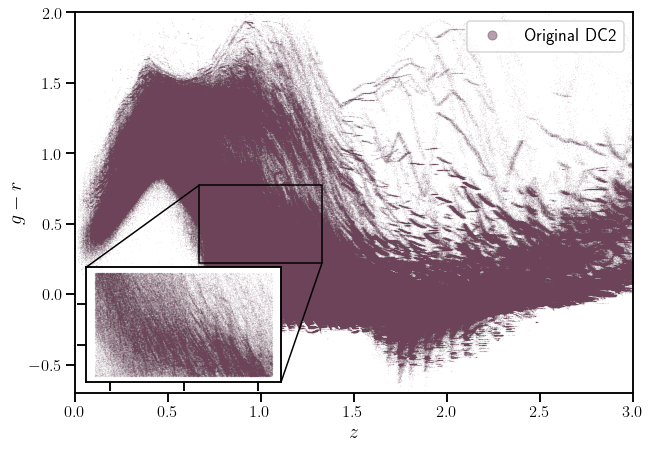

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,7])
# ax[0].plot([],[])
ax.plot(pzsamp['DC2redshift'], gminr, 'o', ms=0.05, alpha=.5, label='Original DC2', c='#6d435a')
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.02,0.03,0.35,0.3])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec='k', zorder=10)
ax2.plot(pzsamp_lim['DC2redshift'].iloc[idx2], pzsamp_lim_gminr.iloc[idx2], 'o', ms=0.02, c='#6d435a')
ax2.set_xticklabels('')
ax2.set_yticklabels('')



legend = ax.legend(fontsize=18, loc='upper right')
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(9)

ax.set_xlim([0,3])
ax.set_ylim([-.7,2])
ax.set_xlabel("$z$", fontsize=20)
# ax[2].set_ylim([4,5])
# ax[2].set_xlim([0,1])
ax.set_ylabel(r"$g-r$", fontsize=20)


# plt.savefig("plots/gminr_vs_Redshift_DC2.png",dpi=300, bbox_inches='tight')



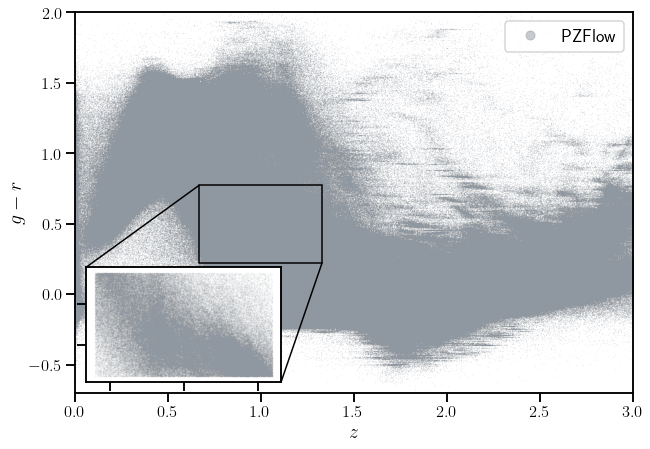

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,7])
ax.plot(pzsamp['PZflowredshift'], gminr, 'o', ms=0.08, alpha=.5, label='PZFlow', c='#8F98A1')
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.02,0.03,0.35,0.3])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec='k', zorder=10)
ax2.plot(pzsamp_lim2['PZflowredshift'].iloc[idx3], pzsamp_lim2_gminr.iloc[idx3], 'o', ms=0.02, c='#8F98A1')
ax2.set_xticklabels('')
ax2.set_yticklabels('')



legend = ax.legend(fontsize=18, loc='upper right')
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(9)

ax.set_xlim([0,3])
ax.set_ylim([-.7,2])
ax.set_xlabel("$z$", fontsize=20)
# ax[2].set_ylim([4,5])
# ax[2].set_xlim([0,1])
ax.set_ylabel(r"$g-r$", fontsize=20)

# ax[2].set_xlabel("z", fontsize=16)
plt.draw()
# plt.savefig("plots/gminr_vs_Redshift_PZFlow.png",dpi=300, bbox_inches='tight')



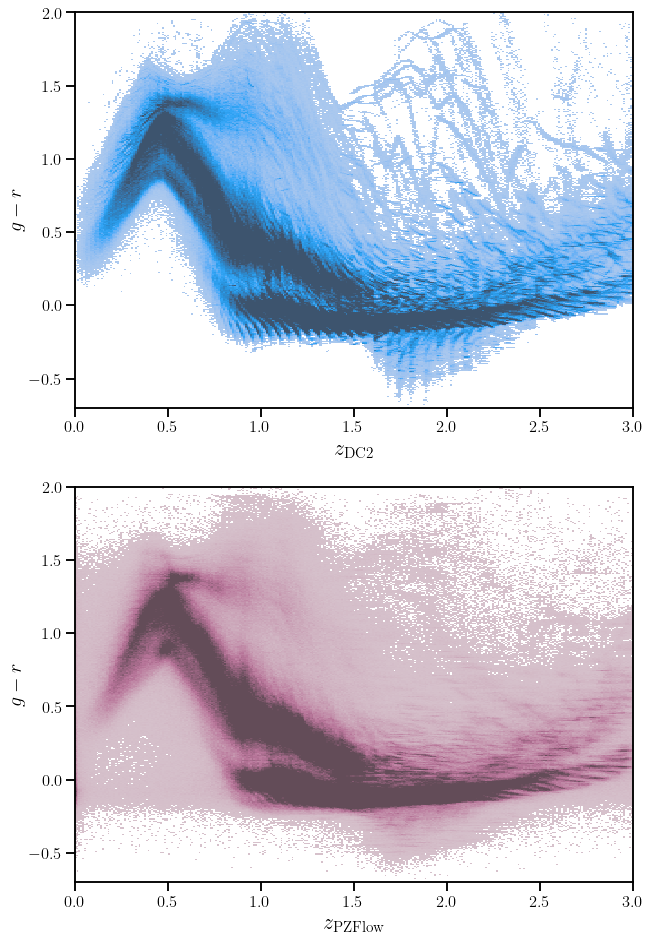

In [10]:
# final version, for paper


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,16])
sns.histplot(x=pzsamp['DC2redshift'], y=gminr, ax=ax[0], pmax=.5, palette='OrRd')
sns.histplot(x=pzsamp['PZflowredshift'], y=gminr, color='#6d435a', ax=ax[1], pmax=.5, palette='OrRd')

l = ['DC2','PZFlow']
c=0
for a in ax:
    a.set_xlim([0,3])
    a.set_ylim([-.7,2])
    a.set_xlabel("$z_{\mathrm{%s}}$"%l[c], fontsize=22)
    a.set_ylabel(r"$g-r$", fontsize=20)
    c+=1
# plt.savefig("plots/gminr_vs_Redshift_DC2_density.png",dpi=300, bbox_inches='tight')

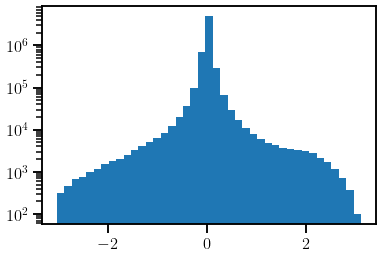

In [11]:
plt.hist(pzsamp['PZflowredshift']-pzsamp['DC2redshift'], bins=41)
plt.yscale("log")

In [12]:
diff = pzsamp['PZflowredshift']-pzsamp['DC2redshift']
print(len(diff[diff<.1])/len(diff))

0.9138116722226872


In [13]:
pzsamp.columns

Index(['mag_true_u_lsst', 'mag_true_g_lsst', 'mag_true_r_lsst',
       'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst', 'galaxy_id',
       'DC2redshift', 'PZflowredshift', 'SFRtot', 'stellar_mass'],
      dtype='object')

In [14]:
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u

In [15]:
def absmag(appmag, z):
    return appmag-5*np.log10(cosmo.luminosity_distance(z).to(u.pc).value+5)
magdiff = absmag(pzsamp['mag_true_g_lsst'],pzsamp['PZflowredshift'])-absmag(pzsamp['mag_true_g_lsst'],pzsamp['DC2redshift'])


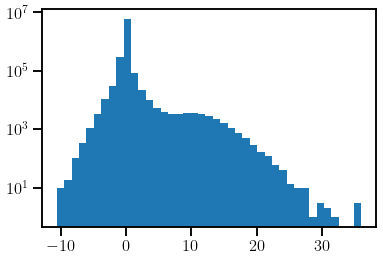

In [17]:
plt.hist(magdiff, bins=41)
plt.yscale("log")

In [18]:
print(len(magdiff[magdiff<.2])/len(magdiff))

0.9285473125020727


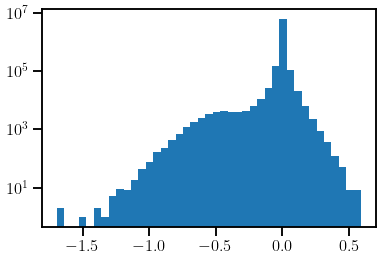

In [19]:
plt.hist(magdiff/absmag(pzsamp['mag_true_g_lsst'],pzsamp['DC2redshift']), bins=41)
plt.yscale("log")